📘 Day 15: Model Evaluation + Feature Importance
🎯 Today’s Goals:
Evaluate your model with confusion matrix, classification report

Understand which features matter most

Learn how to tune your model for better results

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic").dropna()

In [3]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [5]:
df2 = df.drop(['class', 'deck'], axis = 1).copy()
df2.head()

survived  pclass     sex   age  sibsp  parch     fare embarked    who  \
1          1       1  female  38.0      1      0  71.2833        C  woman   
3          1       1  female  35.0      1      0  53.1000        S  woman   
6          0       1    male  54.0      0      0  51.8625        S    man   
10         1       3  female   4.0      1      1  16.7000        S  child   
11         1       1  female  58.0      0      0  26.5500        S  woman   

    adult_male  embark_town alive  alone  
1        False    Cherbourg   yes  False  
3        False  Southampton   yes  False  
6         True  Southampton    no   True  
10       False  Southampton   yes  False  
11       False  Southampton   yes   True

In [21]:
X = df2[["pclass","age","sibsp","parch","fare","adult_male","alone"]]
y = df2["survived"]

In [22]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [23]:
model = RandomForestClassifier()

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = model.predict(x_test)

🔍 1. Evaluate the Model

In [26]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[ 9,  4],
       [ 4, 20]])

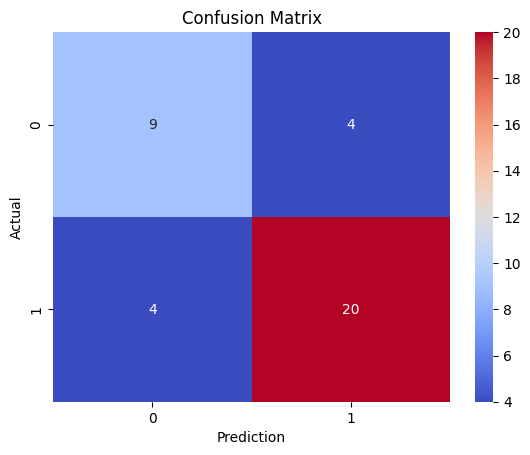

In [27]:
sns.heatmap(cm, annot= True, fmt = 'd', cmap = 'coolwarm')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.83      0.83      0.83        24

    accuracy                           0.78        37
   macro avg       0.76      0.76      0.76        37
weighted avg       0.78      0.78      0.78        37



🌟 2. Feature Importance (What’s driving your model?

In [33]:
import pandas as pd

#Get feature importances

importances = model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({
    "Features": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending = False)

print(feature_df)


     Features  Importance
4        fare    0.305696
1         age    0.304243
5  adult_male    0.288128
3       parch    0.039161
2       sibsp    0.031257
0      pclass    0.020502
6       alone    0.011014


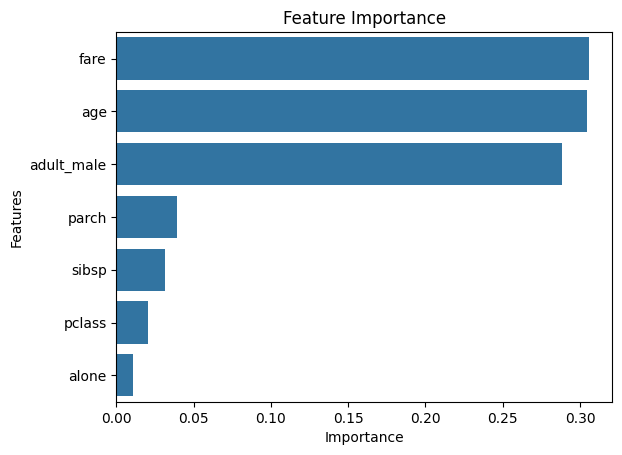

In [34]:
sns.barplot(x = "Importance", y = "Features", data = feature_df)
plt.title("Feature Importance")
plt.show()

Exercise

In [36]:
penguin = sns.load_dataset("penguins").dropna()
penguin.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [37]:
X = penguin[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
y = penguin["species"]

In [38]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [39]:
X_train.shape

(266, 4)

In [40]:
x_test.shape

(67, 4)

In [41]:
y_train.shape

(266,)

In [43]:
y_test.shape

(67,)

In [44]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = model2.predict(x_test)

In [46]:
cm2 = confusion_matrix(y_pred, y_test)
cm2

array([[31,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 23]])

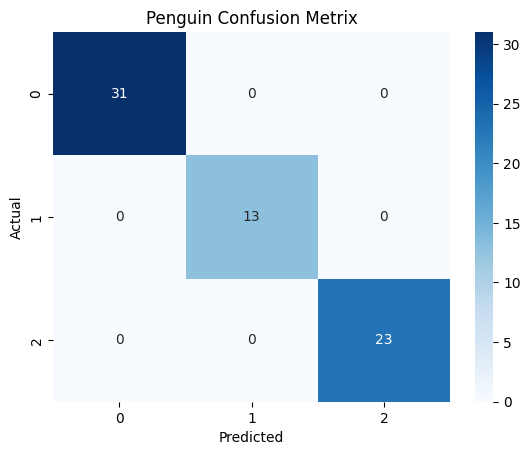

In [47]:
#heatmap
sns.heatmap(cm2, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Penguin Confusion Metrix")
plt.show()

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [51]:
## Feature importances###

importances = model2.feature_importances_
feature_names = X.columns
feature_df2 = pd.DataFrame({
    "features" : feature_names,
    "Importance": importances
}).sort_values(by = "Importance", ascending = False)

In [53]:
print(feature_df2)

            features  Importance
0     bill_length_mm    0.392925
2  flipper_length_mm    0.276261
1      bill_depth_mm    0.253681
3        body_mass_g    0.077132


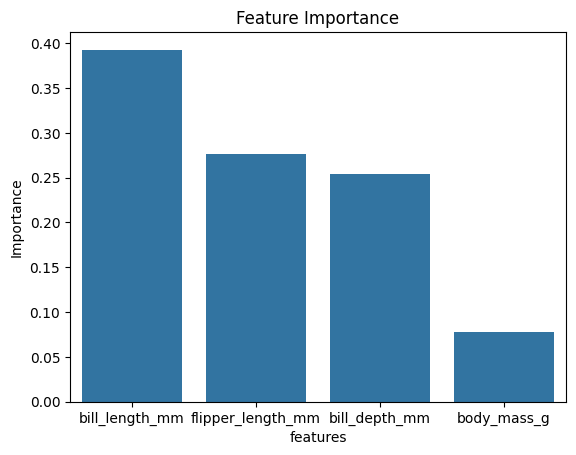

In [57]:
#Barplot
sns.barplot(x = "features", y = "Importance", data = feature_df2)
plt.title("Feature Importance")
plt.show()